In [1]:
from rdkit import Chem
import numpy as np
import pandas as pd
from IPython.display import display
import tqdm

# Load simulator data

In [2]:
dataset = pd.read_csv("/home/abhor/Desktop/datasets/my_uspto/simulator_dataset.csv", index_col=0)

In [3]:
dataset

,reactants,products,rsig,psig,rcen,pcen
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[ClH:7],[CH3:0][NH2:1],[7],[1]
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21,[NH3:19],[NH2:19][CH:20]=[O:21],[19],[19]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5]
...,...,...,...,...,...,...
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2]
448505,CCCCOS(=O)(=O)OCCCC,CCCC[P+](CC)(CC)CC,[OH:4][S:5](=[O:6])(=[O:7])[O:8][CH2:9][CH2:10...,[P+:4]([CH2:5][CH3:6])([CH2:7][CH3:8])[CH2:9][...,[4],[4]
448506,Cc1cccc(C)c1N=C1NCCN1OCc1ccccn1,Cc1cccc(C)c1N=C1NCCN1O,[CH3:15][c:16]1[cH:17][cH:18][cH:19][cH:20][n:...,NaN,[15],[]
448507,Clc1ccnc(Cl)c1,N[n+]1ccc(Cl)cc1Cl,[nH3:4],[NH2:0][n+:1],[4],[1]


# Filtering dataset

In [4]:
# First we remove those reactions where the signature extraction didnt work properly 
# In these cases, the Chem.Mol of either of rsig or psig is None
rsig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["rsig"].tolist())))
psig_worked = np.array(list(map(lambda x: pd.isna(x) or Chem.MolFromSmiles(x) is not None, dataset["psig"].tolist())))

dataset = dataset[rsig_worked & psig_worked]
print(dataset.shape)

[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 3 marked aromatic
[20:12:23] 

[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] non-ring atom 0 marked aromatic
[20:12:23] 

[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] 

[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] 

[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] 

[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] non-ring atom 0 marked aromatic
[20:12:24] 

[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] 

[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] 

[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 3 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] non-ring atom 0 marked aromatic
[20:12:25] 

[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 2 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 3 marked aromatic
[20:12:26] non-ring atom 0 marked ar

[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] 

[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] non-ring atom 9 marked aromatic
[20:12:26] non-ring atom 0 marked aromatic
[20:12:26] 

[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 12 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27]

[20:12:27] non-ring atom 1 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 2 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] 

[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked ar

[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] non-ring atom 0 marked aromatic
[20:12:27] 

[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[20:12:28] non-ring atom 0 marked ar

[20:12:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:28] non-ring atom 3 marked aromatic
[20:12:28] non-ring atom 7 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 2 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 6 marked aromatic
[20:12:28] non-ring atom 3 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 12 13
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:28] non-

[20:12:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5
[20:12:28] non-ring atom 7 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 4 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 8
[20:12:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 3 marked aromatic
[20:12:28] non-ring atom 4 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 0 marked aromatic
[20:12:28] non-ring atom 3 marked aromatic
[20:12:28] non-ring atom 0 marke

[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 4 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 6 7 9 10
[20:12:29] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[20:12:29] non-ring atom 3 marked aromatic
[20:12:29] non-ring atom 3 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 2 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 3 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 1 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 3 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[

[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 5 marked aromatic
[20:12:29] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[20:12:29] non-ring atom 1 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 3 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 2 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] non-ring atom 10 marked aromatic
[20:12:29] non-ring atom 1 marked aromatic
[20:12:29] non-ring atom 4 marked aromatic
[20:12:29] non-ring atom 0 marked aromatic
[20:12:29] Can't kekulize

[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 3 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8 9 10 11 12
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 1 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 1 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 2 marked aromatic
[20:12:30] non-ring atom 5 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic

[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 2 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 7 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 13 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 4 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:30] non-ring atom 2 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 5 marked aromatic
[20:12:30] non-ring atom 3 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] non-ring atom 5 marked aromatic
[20:12:30] non-ring atom 0 marked aromatic
[20:12:30] Can't kekulize mol.  Unk

[20:12:31] non-ring atom 3 marked aromatic
[20:12:31] non-ring atom 2 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:31] non-ring atom 16 marked aromatic
[20:12:31] non-ring atom 1 marked aromatic
[20:12:31] Can't kekulize mol.  Unkekulized atoms: 3 4 5 10 15
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 2 marked aromatic
[20:12:31] non-ring atom 1 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 4 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 7 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 3 marked aromatic
[20:12:31] non-ring atom 0 marke

[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 2 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 1 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] Can't kekulize mol.  Unkekulized atoms: 0 4 8 10 11
[20:12:31] non-ring atom 3 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[20:12:31] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 6 7 8 9
[20:12:31] non-ring atom 14 marked aromatic
[20:12:31] non-ring atom 0 marked aromatic
[20:12:31] Can't kekuliz

[20:12:32] non-ring atom 5 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 8 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:32] non-ring atom 5 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 5 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 8 marked aromatic
[20:12:32

[20:12:32] non-ring atom 5 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 6 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 3 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 1 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] 

[20:12:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 1 marked aromatic
[20:12:32] non-ring atom 6 marked aromatic
[20:12:32] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 13
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 4 marked aromatic
[20:12:32] non-ring atom 2 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] Can't kekulize mol.  Unkekulized atoms: 3 4 16
[20:12:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:32] Can't kekulize mol.  Unkekulized atoms: 7 8 9
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:32] non-ring atom 0 marked aromatic
[20:12:32] non-ring atom 0 mar

[20:12:33] Can't kekulize mol.  Unkekulized atoms: 3 4 7
[20:12:33] non-ring atom 0 marked aromatic
[20:12:33] non-ring atom 2 marked aromatic
[20:12:33] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[20:12:33] non-ring atom 3 marked aromatic
[20:12:33] non-ring atom 8 marked aromatic
[20:12:33] non-ring atom 0 marked aromatic
[20:12:33] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:33] non-ring atom 0 marked aromatic
[20:12:33] non-ring atom 4 marked aromatic
[20:12:33] non-ring atom 0 marked aromatic
[20:12:33] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:33] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:33] non-ring atom 4 marked aromatic
[20:12:33] non-ring atom 0 marked aromatic
[20:12:33] non-ring atom 3 marked aromatic
[20:12:33] non-ring atom 0 marked aromatic
[20:12:33] non-ring atom 0 marked aromatic
[20:12:33] non-ring atom 5 marked aromatic
[20:12:33] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 9
[20:12:33] non-ring atom 9 marked ar

[20:12:34] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 9 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 2 marked aromatic
[20:12:34] non-ring atom 4 marked aromatic
[20:12:34] non-ring atom 5 marked aromatic
[20:12:34] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 10
[20:12:34] non-ring atom 2 marked aromatic
[20:12:34] non-ring atom 4 marked aromatic
[20:12:34] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:34] non-ring atom 1 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 4 marked aromatic
[20:12:34] non-ring atom 9 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] Can't kekulize mol.  Unkekulize

[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 5 marked aromatic
[20:12:34] non-ring atom 4 marked aromatic
[20:12:34] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[20:12:34] non-ring atom 3 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] Can't kekulize mol.  Unkekulized atoms: 5 6 7 9 10 11 12 13 14
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 2 marked aromatic
[20:12:34] Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 6
[20:12:34] non-ring atom 1 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 2 marked aromatic
[20:12:34] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 6
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 4 marked aro

[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 3 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 2 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 8 marked aromatic
[20:12:34] non-ring atom 15 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[20:12:34] non-ring atom 2 marked aromatic
[20:12:34] non-ring atom 2 marked aromatic
[20:12:34] non-ring atom 0 marked aromatic
[20:12:34] non-ring atom 3 marked aromatic
[20:12:34] non-ring atom 2 marked aromatic
[20:12:34] non-ring atom 7

[20:12:35] non-ring atom 10 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 6 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 4 marked aromatic
[20:12:35] non-ring atom 5 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 5 marked aromatic
[20:12:35] Can't kekulize mol.  Unkekulized atoms: 4 5 6 12 18
[20:12:35] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 7 marked aromatic
[20:12:35] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[20:12:35] non-ring atom 3 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring at

[20:12:35] Can't kekulize mol.  Unkekulized atoms: 1 2 9 10 11 12 13 14 15
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 9 marked aromatic
[20:12:35] non-ring atom 3 marked aromatic
[20:12:35] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:35] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 6
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 6 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 6 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 2 marked aromatic
[20:12:35] non-ring atom 0 marked aromatic
[20:12:35] non-ring atom 2 marked aromatic
[20:12:35] Can't kekulize mol.  Unke

[20:12:36] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[20:12:36] non-ring atom 8 marked aromatic
[20:12:36] non-ring atom 6 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 0 1 18 19 20 21 22 23 24
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[20:12:36] non-ring atom 1 marked aromatic
[20:12:36] non-ring atom 5 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 2 marked aromatic
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 0 1 2 5 6
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 7 8 9
[20:12:36] non-ring atom 7 marked aromatic
[20:1

[20:12:36] non-ring atom 1 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 1 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 1 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 3 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 10 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 3 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 6 marked aromatic
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:36] non-ring atom 10 marked aromatic
[20:12:36] non-ring atom 11 marked

[20:12:36] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 5 6 8 9 10 11 12 13 14
[20:12:36] non-ring atom 5 marked aromatic
[20:12:36] non-ring atom 1 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 3 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10 11 12
[20:12:36] non-ring atom 0 marked aromatic
[20:12:36] non-ring atom 2 marked aromatic
[20:12:36] Can't kekulize 

[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 3 marked aromatic
[20:12:37] Can't kekulize mol.  Unkekulized atoms: 0 1 2 9 10
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 4 marked aromatic
[20:12:37] non-ring atom 2 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 6 marked aromatic
[20:12:37] non-ring atom 14 marked aromatic
[20:12:37] non-ring atom 7 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 4 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 2 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 2 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 14
[20:12:37] non-

[20:12:37] non-ring atom 2 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 1 marked aromatic
[20:12:37] Can't kekulize mol.  Unkekulized atoms: 0 1 2
[20:12:37] non-ring atom 8 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 10 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] Can't kekulize mol.  Unkekulized atoms: 1 2 3
[20:12:37] non-ring atom 3 marked aromatic
[20:12:37] non-ring atom 0 marked aromatic
[20:12:37] non-ring atom 8 marked aromatic
[20:12:37] non-ring atom 1 marked aromatic
[20:12:37] non-ring atom 0 marked aroma

[20:12:38] non-ring atom 4 marked aromatic
[20:12:38] non-ring atom 1 marked aromatic
[20:12:38] non-ring atom 3 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 2 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 5 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 6 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2
[20:12:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[20:12:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 10 11 12 13
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 20 21 22
[20:12:38] non-ring atom 0 mark

[20:12:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 2 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 2 marked aromatic
[20:12:38] non-ring atom 5 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 13 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] non-ring atom 0 marked aromatic
[20:12:38] Can't kekulize mol.  Unkekulized atoms: 0

[20:12:39] non-ring atom 5 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 1 marked aromatic
[20:12:39] non-ring atom 4 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 7 8 9 11
[20:12:39] non-ring atom 3 marked aromatic
[20:12:39] non-ring atom 13 marked aromatic
[20:12:39] non-ring atom 2 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 3 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 11 12 13
[20:12:39] non-ring atom 3 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:39] non-ring atom 1 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 2 3 4 9 10 11 12 13 14
[20:12:39] Can't

[20:12:39] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:39] non-ring atom 4 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 5
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:39] non-ring atom 13 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 4 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 7 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized a

[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 3 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 5 marked aromatic
[20:12:39] non-ring atom 3 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 4 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[20:12:39] non-ring atom 3 marked aromatic
[20:12:39] non-ring atom 6 marked aromatic
[20:12:39] non-ring atom 6 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic
[20:12:39] non-ring atom 0 marked aromatic

(414904, 6)


[20:12:40] non-ring atom 2 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ring atom 13 marked aromatic
[20:12:40] non-ring atom 3 marked aromatic
[20:12:40] non-ring atom 2 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ring atom 2 marked aromatic
[20:12:40] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[20:12:40] non-ring atom 3 marked aromatic
[20:12:40] non-ring atom 4 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ring atom 6 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ring atom 4 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ring atom 0 marked aromatic
[20:12:40] non-ri

In [5]:
# we only consider actions from the following reactions: 
# 1. len(rcen) >= len(pcen) (Hydrogen in product is allowed)
# 2. len(rcen) != 0. len(pcen) == 0 is allowed. = 0 means Hydrogen, so we do not want Hydrogen removals because
#    there are too many options in that case. Adding a Hydrogen is fine since that is deterministic.
# 3. len(rcen) <= 2 and len(pcen) <= 2. The cases where this is not true is typically because the 
#    reactant-product mapping is wrong. These cases are very few anyways so it's fine.
rlen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["rcen"])))
plen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["pcen"])))
dataset = dataset[(rlen>=plen) & (rlen!=0) & (rlen<=2) & (plen<=2)]
dataset

,reactants,products,rsig,psig,rcen,pcen
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[ClH:7],[CH3:0][NH2:1],[7],[1]
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21,[NH3:19],[NH2:19][CH:20]=[O:21],[19],[19]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5]
...,...,...,...,...,...,...
448501,COC(=O)c1ccc(-n2cnc3cc(C#N)ccc32)cc1,N#Cc1ccc2c(c1)ncn2-c1ccc(C(=O)N2CCC(N3CCCC3)C2...,[CH3:0][OH:1],[NH:17]1[CH2:18][CH2:19][CH:20]([N:21]2[CH2:22...,[1],[17]
448502,O=C(Cl)OCC(Cl)(Cl)Cl,O=C(O)OCC(Cl)(Cl)Cl,[ClH:2],[OH2:2],[2],[2]
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2]
448505,CCCCOS(=O)(=O)OCCCC,CCCC[P+](CC)(CC)CC,[OH:4][S:5](=[O:6])(=[O:7])[O:8][CH2:9][CH2:10...,[P+:4]([CH2:5][CH3:6])([CH2:7][CH3:8])[CH2:9][...,[4],[4]


In [6]:
# Mare sure no hydrogens in reactions. For product, add hydrogen to the actions
assert not dataset["rsig"].isna().any(), "There are hydrogens in reactant signatures!!!!"

# In the previous script, I forgot to add atom number to hydrogen. Let's do that too.
for i in range(dataset.shape[0]):
    if dataset.iloc[i]["rsig"] == "[H]":
        dataset.iloc[i]["rsig"] = "[H:0]"

dataset.loc[dataset["psig"].isna(), "pcen"] = "[0]"
dataset.loc[dataset["psig"].isna(), "psig"] = "[H:0]"

In [7]:
# Taking a look at what combinations are left
rlen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["rcen"])))
plen = np.array(list(map(lambda x: len(x.strip("[]").split(",")) if len(x) > 2 else 0, dataset["pcen"])))
np.unique(list(map(lambda x, y: f"{x}-{y}", rlen, plen)), return_counts=True)

(array(['1-1', '2-1', '2-2'], dtype='<U3'), array([403188,   4784,    469]))

So there are  
400K pairs of 1-1  
4.7K pairs of 2-1  
0.5K pairs of 2-2  

Now let us sort the ones which have 2 in them

In [8]:
# temp_df = dataset[(rlen!=1) & (plen!=1)]
temp_df = dataset[(rlen!=2) & (plen!=2)]

In [9]:
# First let us remove those cases where number of centres is more than number of signatures
rcenlen = np.array(list(map(lambda x: len(x.split(",")), temp_df["rcen"])))
pcenlen = np.array(list(map(lambda x: len(x.split(",")), temp_df["pcen"])))
rsiglen = np.array(list(map(lambda x: len(x.split(".")), temp_df["rsig"])))
psiglen = np.array(list(map(lambda x: len(x.split(".")), temp_df["psig"])))

temp_df = temp_df[(rcenlen==rsiglen) & (pcenlen==psiglen)]

In [10]:
# First take a look at some
i = -1

reactants           CON(C)C(=O)c1ccc(O)nc1
products            CC(C)CC(=O)c1ccc(O)nc1
rsig             [CH3:0][O:1][NH:2][CH3:3]
psig         [CH3:0][CH:1]([CH3:2])[CH3:3]
rcen                                   [2]
pcen                                   [3]
Name: 0, dtype: object
Reactant


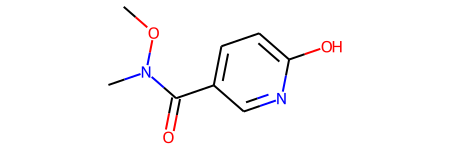

Product


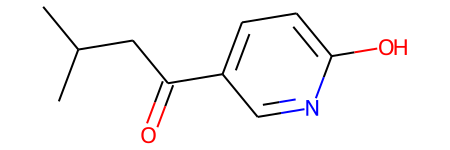

Reactant subgroup


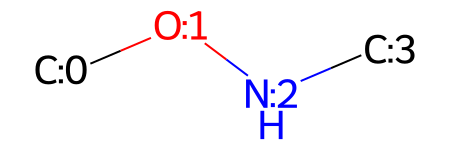

Product subgroup


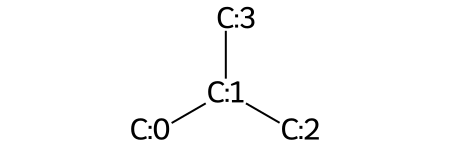

In [11]:
i+=1
print(temp_df.iloc[i])
print("Reactant")
display(Chem.MolFromSmiles(temp_df.iloc[i]["reactants"]))
print("Product")
display(Chem.MolFromSmiles(temp_df.iloc[i]["products"]))
print("Reactant subgroup")
display(Chem.MolFromSmiles(temp_df.iloc[i]["rsig"]))
print("Product subgroup")
display(Chem.MolFromSmiles(temp_df.iloc[i]["psig"]))

# Let's just dump the ones with 1-1 because there are enough of them

In [12]:
dataset = dataset[(rlen==1)&(plen==1)]

dataset.shape

(403188, 6)

In [13]:
# First, we confirm that num(sig) = num(cen)
rcenlen = np.array(list(map(lambda x: len(x.split(",")), dataset["rcen"])))
pcenlen = np.array(list(map(lambda x: len(x.split(",")), dataset["pcen"])))
rsiglen = np.array(list(map(lambda x: len(x.split(".")), dataset["rsig"])))
psiglen = np.array(list(map(lambda x: len(x.split(".")), dataset["psig"])))

dataset = dataset[(rcenlen==rsiglen) & (pcenlen==psiglen)]
dataset.shape

(402063, 6)

In [14]:
dataset

,reactants,products,rsig,psig,rcen,pcen
0,CON(C)C(=O)c1ccc(O)nc1,CC(C)CC(=O)c1ccc(O)nc1,[CH3:0][O:1][NH:2][CH3:3],[CH3:0][CH:1]([CH3:2])[CH3:3],[2],[3]
1,O=C(O)c1ccc(Cl)c([N+](=O)[O-])c1,CNc1ccc(C(=O)O)cc1[N+](=O)[O-],[ClH:7],[CH3:0][NH2:1],[7],[1]
2,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(N)cc3)cc21,CCn1cc(C(=O)O)c(=O)c2cc(F)c(-c3ccc(NC=O)cc3)cc21,[NH3:19],[NH2:19][CH:20]=[O:21],[19],[19]
3,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)O)c1,COCC(C)Oc1cc(Oc2cnc(C(=O)N3CCC3)cn2)cc(C(=O)Nc...,[OH2:26],[NH2:26][c:27]1[cH:28][n:29][c:30]([CH3:31])[c...,[26],[26]
4,Clc1cc2c(Cl)nc(-c3ccncc3)nc2s1,Clc1cc2c(NCc3ccc(Cl)c(Cl)c3)nc(-c3ccncc3)nc2s1,[ClH:5],[NH2:5][CH2:6][c:7]1[cH:8][cH:9][c:10]([Cl:11]...,[5],[5]
...,...,...,...,...,...,...
448501,COC(=O)c1ccc(-n2cnc3cc(C#N)ccc32)cc1,N#Cc1ccc2c(c1)ncn2-c1ccc(C(=O)N2CCC(N3CCCC3)C2...,[CH3:0][OH:1],[NH:17]1[CH2:18][CH2:19][CH:20]([N:21]2[CH2:22...,[1],[17]
448502,O=C(Cl)OCC(Cl)(Cl)Cl,O=C(O)OCC(Cl)(Cl)Cl,[ClH:2],[OH2:2],[2],[2]
448504,CCP(CC)CC,CCCCOS(=O)(=O)[O-],[PH:2]([CH2:3][CH3:4])[CH2:5][CH3:6],[CH3:2][CH2:3][O:4][S:5](=[O:6])(=[O:7])[O-:8],[2],[2]
448505,CCCCOS(=O)(=O)OCCCC,CCCC[P+](CC)(CC)CC,[OH:4][S:5](=[O:6])(=[O:7])[O:8][CH2:9][CH2:10...,[P+:4]([CH2:5][CH3:6])([CH2:7][CH3:8])[CH2:9][...,[4],[4]


In [19]:
# Renumber the atoms in the signatures to start from 0 and be contiguous. Renumber the centre accordingly. 

def reduce_atom_num_and_centre(smiles, centre):
    '''
    Reduce the atom numbers to start from 0. Reduce centre by same amount. 
    Centre is in format '[x]'. Make it x of type int.
    Return new_smiles, x
    '''
    mol = Chem.MolFromSmiles(smiles)
    for idx in range(mol.GetNumAtoms()):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str(idx) )

    atom_num_list = list(map(lambda x: int(mol.GetAtomWithIdx(x).GetProp("molAtomMapNumber")), range(mol.GetNumAtoms())))
    atom_num_list = np.array(atom_num_list)
    new_cen = abs(atom_num_list-int(centre[1:-1])).argmin()
    return Chem.MolToSmiles(mol), new_cen

for i in tqdm.tqdm(range(dataset.shape[0]), total=dataset.shape[0]):
    _, _, rsig, psig, rcen, pcen = dataset.iloc[i]
    rsig, rcen = reduce_atom_num_and_centre(rsig, rcen)
    psig, pcen = reduce_atom_num_and_centre(psig, pcen)
    dataset.iloc[i]["rsig"] = rsig
    dataset.iloc[i]["psig"] = psig
    dataset.iloc[i]["rcen"] = rcen
    dataset.iloc[i]["pcen"] = pcen

100%|██████████████████████████████████████████████████████| 402063/402063 [03:01<00:00, 2214.84it/s]


ACTION REMAP  
Renumber the atoms in the actions. Renumber the centre.  
Find which rsig are same(and the same corresponding centre), then map unique rsig to all possible psigs 

In [21]:
# First create clusters based on atom type and numbers
d = {}
for i in tqdm.tqdm(range(dataset.shape[0]), total=dataset.shape[0]):
    rsig = dataset.iloc[i]["rsig"]
    
    l = list(map(str.upper, list(filter(str.isalpha, list(rsig)))))
    l.sort()
    _id = "".join(l)
    _id = _id.replace("H", "")
    
    if _id in d:
        d[_id].append(i)
    else:
        d[_id] = [i]

100%|█████████████████████████████████████████████████████| 402063/402063 [00:16<00:00, 23937.42it/s]


In [22]:
d.keys()

dict_keys(['CCNO', 'CL', 'N', 'O', 'CN', 'CFFFOOOS', 'COOS', 'CCCCCC', 'C', 'CCCOO', 'I', 'BR', 'CCCCCOO', 'CO', 'CCCNO', 'CCOOO', 'CCCCCCC', 'BCCCCCCOO', 'COOOS', 'CCCCCCCOOS', 'CNO', 'BOO', 'CCCCOOOP', 'F', 'CCOO', 'CCO', 'CC', 'NOO', 'CCCCCCCCCCCCC', 'CCCC', 'CCCIS', 'CCCCCCIS', 'CCCCCCCCNOO', 'CCCCCCCCCCCCCCCCNOOO', 'BBPRR', 'COO', 'BBBCRRR', 'CCCCCNOO', 'CCCCCO', 'CCCCNOOO', 'S', 'CCCCCCCCO', 'CS', 'CCCCCCCCCIS', 'CCCCCCCCOO', 'CCCCCCCCCOO', 'CCCCCCCCN', 'CCC', 'CCCO', 'CCCCCCCCCOOOO', 'CCCCCCOO', 'NN', 'CCCCCCCCCCCCCO', 'OP', 'CCCOOO', 'CCCN', 'CCCIOS', 'CCCCCCIOS', 'COS', 'CCCCO', 'CCCCCCCCNNOOOO', 'CCN', 'CCCCCCCCCCCCCCCCCCC', 'CCCCCCCCCCCCCCCCCCP', 'CCFFFO', 'CCCCN', 'CFFFOOS', 'CCCCCLLLO', 'CCCCCCCCCCCCCCCCIS', 'CCCCCCCNNOO', 'CCNOO', 'CCCCCCOOS', 'CCCCCCCCNNO', 'CCCCCCCO', 'CCCCCCS', 'CCCCCCCLO', 'CCCINS', 'CCCCCCCCCCCCCCCOO', 'CCCCOO', 'CCCCCCO', 'CCFFFOOOS', 'CCCCCNOS', 'CCCCCCNOOOOS', 'OOOS', 'CCCCNNNO', 'CCCCCCCCCCCCCCCCCOOOOOS', 'CCCNS', 'CCCCCCCOOOS', 'CCCCFFFFFFFFFOOO

In [23]:
# Divide the clusters based on signature structure
def divide_based_on_signatures(listy, r_or_p="r"):
    if r_or_p=="r":
        sig_choice = "rsig"
    elif r_or_p == "p":
        sig_choice = "psig"
        
    reference_d = {}
    cluster_d = {}
    for i in listy:
        rsig = Chem.MolFromSmiles(dataset.iloc[i][sig_choice])
        if not reference_d: # Starting element
            cluster_d[i] = [i]
            reference_d[i] = rsig
            continue
        
        # Search for appropriate cluster
        clustered = False
        for key_i in reference_d:
            ref_rsig = reference_d[key_i]
            if rsig.HasSubstructMatch(ref_rsig) and ref_rsig.HasSubstructMatch(rsig):
                # Add to this cluster
                cluster_d[key_i].append(i)
                clustered = True
                break
                
        if not clustered: # Add a new cluster
            cluster_d[i] = [i]
            reference_d[i] = rsig
            
    return cluster_d

super_d = {}
for key in tqdm.tqdm(d, total=len(d.keys())):
    super_d.update(divide_based_on_signatures(d[key]))

100%|████████████████████████████████████████████████████████████| 1253/1253 [00:23<00:00, 53.82it/s]


In [24]:
# Divide the clusters based on reaction centre
def divide_based_on_rcen(listy, r_or_p="r"):
    if r_or_p=="r":
        sig_choice = "rsig"
        cen_choice = "rcen"
    elif r_or_p == "p":
        sig_choice = "psig"
        cen_choice = "pcen"
        
    reference_d = {}
    reference_cen = {}
    cluster_d = {}
    for i in listy:
        rsig = Chem.MolFromSmiles(dataset.iloc[i][sig_choice])
        if not reference_d: # Starting element
            cluster_d[i] = [i]
            reference_d[i] = rsig
            reference_cen[i] = dataset.iloc[i][cen_choice]
            continue
        
        # Search for appropriate cluster
        clustered = False
        for key_i in reference_d:
            ref_rsig = reference_d[key_i]
            try:
                if rsig.GetSubstructMatch(ref_rsig)[dataset.iloc[key_i][cen_choice]] == reference_cen[key_i]:
                    # Add to this cluster
                    cluster_d[key_i].append(i)
                    clustered = True
                    break
            except Exception as e:
                print(key_i, i)
                print(e)
                return
                
        if not clustered: # Add a new cluster
            cluster_d[i] = [i]
            reference_d[i] = rsig
            reference_cen[i] = dataset.iloc[i][cen_choice]
            
    return cluster_d

super_duper_d = {}
for key in tqdm.tqdm(super_d, total=len(super_d.keys())):
    super_duper_d.update(divide_based_on_rcen(super_d[key]))

100%|████████████████████████████████████████████████████████████| 3464/3464 [00:39<00:00, 88.23it/s]


In [25]:
# Finally we divide based on psig and pcen so that we can get unique rsig to unique psig matchings
semi_final_d = {}
for key in tqdm.tqdm(super_duper_d, total=len(super_duper_d.keys())):
    semi_final_d[key] = divide_based_on_signatures(super_duper_d[key], r_or_p="p")

    
    
final_d = {}
for key in tqdm.tqdm(semi_final_d, total=len(semi_final_d.keys())):
    new_d = {}
    temp_d = semi_final_d[key]
    for temp_key in temp_d:
        new_d[temp_key] = divide_based_on_rcen(temp_d[temp_key], r_or_p="p")
    final_d[key] = new_d

100%|████████████████████████████████████████████████████████████| 3967/3967 [14:48<00:00,  4.47it/s]


In [69]:
# Finally, we dump a DataFrame with unique rsig-psig pairs(actions)
# Also, we group rsigs so that searching becomes easier later on
# action_df = DataFrame

unique_rsig_indexer = np.zeros(shape=dataset.shape[0], dtype=int)
for key in super_duper_d:
    for ele in super_duper_d[key]:
        unique_rsig_indexer[ele] = key
        
dataset["rsig_clusters"] = unique_rsig_indexer

unique_action_indexer = []
for key in final_d:
    for key2 in final_d[key]:
        unique_action_indexer.extend(list(final_d[key][key2].keys()))

action_df = dataset.iloc[unique_action_indexer]

action_df.to_csv("/home/abhor/Desktop/repos/ReactionRL/datasets/my_uspto/action_dataset.csv")